# Analysis of Trial Data

Using annalysis.py, and previous nb, analyze the following:
1. Network weight convergence (4-30 trials)

In [1]:
%matplotlib inline
## matplotlib notebook interacts negatively with imagemagick GIF writer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

mpl.style.use('mitch-exp')

In [2]:
import annalysis as ann

In [3]:
reload(ann)

<module 'annalysis' from 'annalysis.pyc'>

In [4]:
ls

002852_0414.csv          data 4-30/               data 5-30_4/
Icon?                    data 4-30_2/             data 5_02_1/
analysis-dev.ipynb       data 4-30_3/             fig/
analysis.ipynb           data 4-30_4/             keras-matlab-test.ipynb
annalysis.py             data 5-01_2/             keras-tutorial.ipynb
annalysis.pyc            data 5-1/                net-analysis.ipynb
cross_track_errors.csv   data 5-30_2/             trials/
data/                    data 5-30_3/


In [6]:
ls data\ 5_02_1

GPID_trial_01_meta_05-02-17_11-47-51.csv
GPID_trial_01_out_05-02-17_11-47-51.csv
GPID_trial_02_meta_05-02-17_11-49-25.csv
GPID_trial_02_out_05-02-17_11-49-25.csv
GPID_trial_03_meta_05-02-17_11-49-49.csv
GPID_trial_03_out_05-02-17_11-49-49.csv
GPID_trial_04_meta_05-02-17_11-50-09.csv
GPID_trial_04_out_05-02-17_11-50-09.csv
GPID_trial_05_meta_05-02-17_11-50-29.csv
GPID_trial_05_out_05-02-17_11-50-29.csv
GPID_trial_06_meta_05-02-17_11-50-49.csv
GPID_trial_06_out_05-02-17_11-50-49.csv
GPID_trial_07_meta_05-02-17_11-51-01.csv
GPID_trial_07_out_05-02-17_11-51-01.csv
GPID_trial_08_meta_05-02-17_11-51-16.csv
GPID_trial_08_out_05-02-17_11-51-16.csv
GPID_trial_09_meta_05-02-17_11-51-27.csv
GPID_trial_09_out_05-02-17_11-51-27.csv
GPID_trial_100_meta_05-02-17_12-12-49.csv
GPID_trial_100_out_05-02-17_12-12-49.csv
GPID_trial_101_meta_05-02-17_12-13-00.csv
GPID_trial_101_out_05-02-17_12-13-00.csv
GPID_trial_102_meta_05-02-17_12-13-01.csv
GPID_trial_102_out_05-02-17_12-13-01.csv
GPID_trial_103_meta_05

## Network Weight Convergence

Plot network weights for `data<x-xx>/` and study convergence properties.

In [7]:
import os

In [10]:
direct = 'data 5_02_1/'
fpaths = os.listdir(direct)
fpaths = [fpath for fpath in fpaths if 'out' in fpath and 'GPID' in fpath]

In [11]:
len(fpaths)

159

In [12]:
trials = []
trial_metas = []

for fp in fpaths:
    tr, trm = ann.load_data_from_fname(direct + fp)
    tr.set_index('t')
    trials.append(tr)
    trial_metas.append(trm)

In [13]:
fpaths[0].split('_out')[0]

'GPID_trial_01'

In [14]:
for tr, fp in tqdm(zip(trials, fpaths)):
    fs = fp.split('out')[0]
    plt.figure(figsize=(6, 6))
    plt.ylabel('Weight')

    plt.subplot(3, 1, 1)
    plt.plot(tr['t'], tr['wt1'])
    plt.title(fs + ' Weights')
    plt.ylabel('kP')

    plt.subplot(3, 1, 2)
    plt.plot(tr['t'], tr['wt2'])
    plt.ylabel('kI')

    plt.subplot(3, 1, 3)
    plt.plot(tr['t'], tr['wt3'])
    plt.ylabel('kD')

    plt.xlabel('Time (s)')

    plt.tight_layout()
    plt.savefig('fig/' + fs + '_weights.pdf')
    plt.close()

  2%|▏         | 3/159 [00:02<02:19,  1.12it/s]


KeyboardInterrupt: 

### XTE for all network trials

Fill numpy array with cross track error for each trial.

In [15]:
ctes = np.zeros((len(fpaths), 2))
ctes[:, 0] = np.arange(len(fpaths)) + 1
ctes[:5]

array([[ 1.,  0.],
       [ 2.,  0.],
       [ 3.,  0.],
       [ 4.,  0.],
       [ 5.,  0.]])

In [16]:
# for trial in trials:
#     trial['em_x'] = trial['wt6']
#     trial['em_y'] = trial['wt7']

In [17]:
ann.straight_mean_cte(trials[0], trial_metas[0])

1.8363106252452712

In [18]:
for i, (tr, trm) in tqdm(enumerate(zip(trials, trial_metas))):
    ctes[i, 1] = ann.straight_mean_cte(tr, trm)

159it [00:00, 534.78it/s]


In [19]:
ctedf = pd.DataFrame(ctes)
ctedf.columns = ['Trial No.', 'Mean CTE']
ctedf = ctedf.set_index('Trial No.')
ctedf.describe()

,Mean CTE
count,159.000000
mean,1.379230
std,0.957941
min,0.000000
25%,0.705472
50%,1.182467
75%,1.870449
max,4.888916


In [20]:
ctedf['Smoothed Mean CTE'] = ctedf['Mean CTE'].rolling(min_periods=3, window=25).mean()

In [21]:
len(ctedf)

159

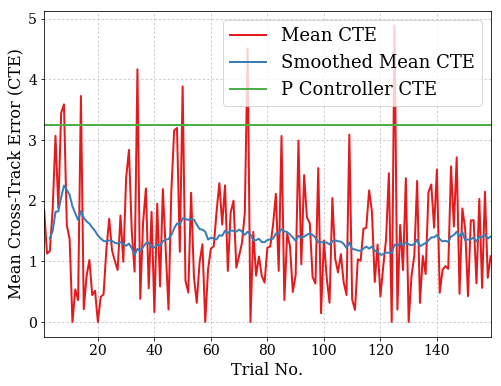

In [23]:
plt.figure(figsize=(8, 6))

y = np.ones(len(ctedf))*3.24
ctedf['P Controller CTE'] = y

ctedf.plot(figsize=(8, 6))
plt.ylabel('Mean Cross-Track Error (CTE)')
plt.savefig('fig/cte_neural_net_05_02_1.pdf')


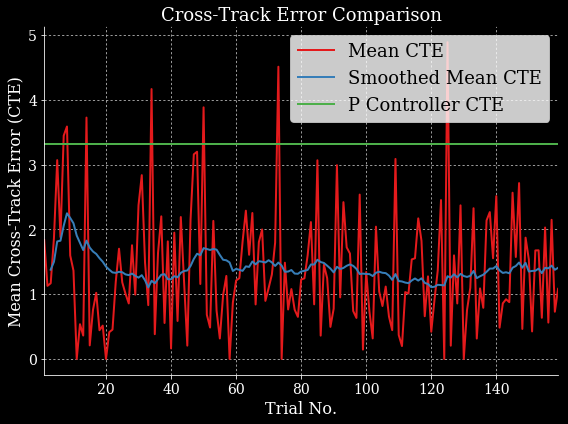

In [42]:
y = np.ones(len(ctedf))*3.32
ctedf['P Controller CTE'] = y

ctedf.plot(figsize=(8, 6))
fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('black')
ax.set_facecolor('k')

plt.title('Cross-Track Error Comparison', color='white')

plt.ylabel('Mean Cross-Track Error (CTE)')

ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')

plt.tight_layout()

plt.savefig('fig/video2.png', facecolor=fig.get_facecolor(), edgecolor='none', dpi=600)

In [82]:
ctedf.describe()

,Mean CTE,Smoothed Mean CTE,P Controller CTE
count,300.000000,298.000000,3.000000e+02
mean,15.902853,16.010089,2.786900e+00
std,21.462428,13.649073,1.957257e-14
min,0.000000,1.123235,2.786900e+00
25%,1.111477,NaN,2.786900e+00
50%,2.923976,NaN,2.786900e+00
75%,30.999425,NaN,2.786900e+00
max,72.515584,38.121612,2.786900e+00


## Add P-Controller CTEs

From data 4-30_4

In [25]:
ls

002852_0414.csv          data 4-30/               data 5-30_4/
Icon?                    data 4-30_2/             data 5_02_1/
analysis-dev.ipynb       data 4-30_3/             fig/
analysis.ipynb           data 4-30_4/             keras-matlab-test.ipynb
annalysis.py             data 5-01_2/             keras-tutorial.ipynb
annalysis.pyc            data 5-1/                net-analysis.ipynb
cross_track_errors.csv   data 5-30_2/             trials/
data/                    data 5-30_3/


In [26]:
dir2 = 'data 5_02_1/'
trials2 = []
trial_metas2 = []
fpaths = [fp for fp in os.listdir(dir2) if 'out' in fp and 'P_' in fp]

for fp in fpaths:
    tr, trm = ann.load_data_from_fname(dir2 + fp)
    tr.set_index('t')
    trials2.append(tr)
    trial_metas2.append(trm)

In [27]:
ctes2 = np.zeros((len(fpaths), 2))
ctes2[:, 0] = np.arange(len(fpaths)) + 1
ctes2[:5]

array([[ 1.,  0.],
       [ 2.,  0.],
       [ 3.,  0.],
       [ 4.,  0.],
       [ 5.,  0.]])

In [28]:
trials2[0].tail()

,t,u,wt1,wt2,wt3,r,y,em_x,em_y,Unnamed: 9
345,69.0,-0.036797,NaN,NaN,NaN,1.2299,1.4139,27.8422,30.7852,NaN
346,69.2,-0.037499,NaN,NaN,NaN,1.2261,1.4136,27.8934,30.9098,NaN
347,69.4,-0.038197,NaN,NaN,NaN,1.2223,1.4133,27.9445,31.0345,NaN
348,69.6,-0.038891,NaN,NaN,NaN,1.2185,1.4130,27.9957,31.1591,NaN
349,69.8,-0.038990,NaN,NaN,NaN,1.2177,1.4127,28.0470,31.2837,NaN


In [29]:
# for trial in trials:
#     trial['em_x'] = trial['wt6']
#     trial['em_y'] = trial['wt7']

In [30]:
ann.straight_mean_cte(trials2[12], trial_metas2[12])

0.30634916705708931

In [31]:
for i, (tr, trm) in tqdm(enumerate(zip(trials2, trial_metas2))):
    ctes2[i, 1] = ann.straight_mean_cte(tr, trm)

159it [00:00, 275.86it/s]


In [33]:
ctedf2 = pd.DataFrame(ctes2)
ctedf2.columns = ['Trial No.', 'Mean CTE P']
ctedf2 = ctedf2.set_index('Trial No.')
ctedf2.head()

,Mean CTE P
Trial No.,
1.0,6.003525
2.0,NaN
3.0,4.187467
4.0,4.248851
5.0,5.291408


In [34]:
ctedf2['Smoothed Mean CTE P'] = ctedf2['Mean CTE P'].rolling(min_periods=3, window=25).mean()

In [35]:
ctedf2['Mean CTE P'].mean()

3.3297239328197805

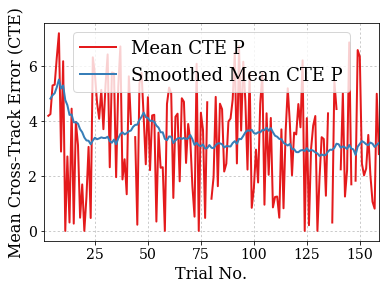

In [36]:
ctedf2.plot()
plt.ylabel('Mean Cross-Track Error (CTE)')
plt.savefig('fig/cte_neural_net_P2.pdf')

In [95]:
ctedf2.describe()

,Mean CTE P,Smoothed Mean CTE P
count,170.000000,288.000000
mean,3.241917,3.024034
std,1.988917,0.862883
min,0.000000,0.784560
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,7.190729,5.506904


## Weights across all trials

Show the weights at the end of each trial.

In [38]:
wts = np.zeros((len(trials), 4))
wts[:, 0] = np.arange(len(trials))

for i, tr in enumerate(trials):
    tr = tr.set_index('t')
    wts[i, 1:] = tr[['wt1', 'wt2', 'wt3']].values[-1]

In [39]:
wtsdf = pd.DataFrame(wts)
wtsdf.columns = ['trial', 'wt1', 'wt2', 'wt3']
wtsdf = wtsdf.set_index('trial')
wtsdf.head()

,wt1,wt2,wt3
trial,,,
0.0,0.70230,0.010357,0.97499
1.0,0.70207,0.010385,0.97433
2.0,0.70825,0.010837,0.87869
3.0,0.70797,0.011023,0.86405
4.0,0.70519,0.010965,0.82796


In [40]:
wts_smooth = wtsdf[['wt1', 'wt2', 'wt3']].rolling(min_periods=1, window=25).mean()
wts_smooth.head()

,wt1,wt2,wt3
trial,,,
0.0,0.702300,0.010357,0.974990
1.0,0.702185,0.010371,0.974660
2.0,0.704207,0.010526,0.942670
3.0,0.705148,0.010651,0.923015
4.0,0.705156,0.010713,0.904004


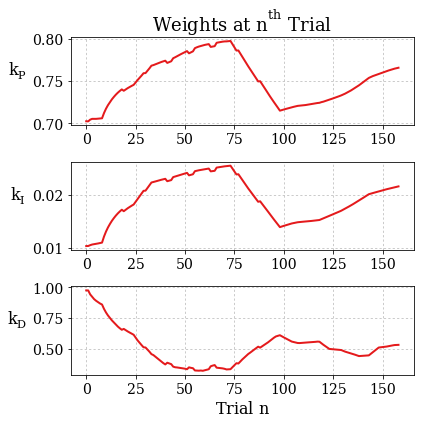

In [41]:
fs = fp.split('out')[0]
plt.figure(figsize=(6, 6))
plt.ylabel('Weight')

ax1 = plt.subplot(3, 1, 1)
plt.plot(wts_smooth['wt1'])
plt.title('Weights at $n^{th}$ Trial')
plt.ylabel('$k_P$', rotation='horizontal')
ax1.yaxis.labelpad = 15

ax2 = plt.subplot(3, 1, 2)
plt.plot(wts_smooth['wt2'])
plt.ylabel('$k_I$', rotation='horizontal')
ax2.yaxis.labelpad = 15

ax3 = plt.subplot(3, 1, 3)
plt.plot(wts_smooth['wt3'])
plt.ylabel('$k_D$', rotation='horizontal')
ax3.yaxis.labelpad = 15

plt.xlabel('Trial $n$')

plt.tight_layout()
plt.savefig('fig/trial_weights2.pdf')

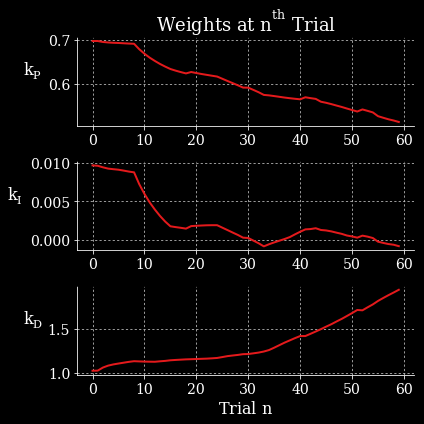

In [125]:
fs = fp.split('out')[0]
fig = plt.figure(figsize=(6, 6))
plt.ylabel('Weight')

fig.patch.set_facecolor('black')

ax1 = plt.subplot(3, 1, 1)
plt.plot(wts_smooth['wt1'])
plt.title('Weights at $n^{th}$ Trial', color='white')
plt.ylabel('$k_P$', rotation='horizontal')
ax1.yaxis.labelpad = 15

ax2 = plt.subplot(3, 1, 2)
plt.plot(wts_smooth['wt2'])
plt.ylabel('$k_I$', rotation='horizontal')
ax2.yaxis.labelpad = 15

ax3 = plt.subplot(3, 1, 3)
plt.plot(wts_smooth['wt3'])
plt.ylabel('$k_D$', rotation='horizontal')
ax3.yaxis.labelpad = 15

plt.xlabel('Trial $n$')

for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('k')
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='y', colors='white')


plt.tight_layout()
plt.savefig('fig/trial_weights2_blck.png')

___

In [40]:
trial_metas[0]

,train_bool,path_type,LOS_radius,em2vic_x,em2vic_y,theta_i,current_x,current_y,throttle,mem,step,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,4,10,-14.2612,20.0998,0.96022,-0.19736,0.038921,3,100,0.0001,0.000001,0.1,NaN


In [39]:
trials[-1][['wt1', 'wt2', 'wt3']].values[-1]

array([ 0.69999  ,  0.0099977,  1.0025   ])